<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n250.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.331914,2.126274,34.458188,32.166889,2.291299
1,0.0,1.0,51.529956,6.760338,68.290294,58.954652,9.335642
2,0.0,2.0,61.959948,-4.079780,67.880168,68.523655,-0.643487
3,0.0,3.0,90.195888,-12.544976,87.650913,94.428738,-6.777825
4,0.0,4.0,87.284543,-11.834620,85.449923,91.757722,-6.307798
...,...,...,...,...,...,...,...
119995,999.0,115.0,36.519341,-4.051025,42.468316,47.951824,-5.483507
119996,999.0,116.0,81.855836,-13.410170,78.445665,92.010211,-13.564546
119997,999.0,117.0,44.432885,-0.074839,54.358047,55.642273,-1.284226
119998,999.0,118.0,25.226066,6.749216,41.975281,36.976923,4.998358


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.331914,2.126274,34.458188,32.166889,2.291299
1,0.0,1.0,51.529956,6.760338,68.290294,58.954652,9.335642
2,0.0,2.0,61.959948,-4.079780,67.880168,68.523655,-0.643487
3,0.0,3.0,90.195888,-12.544976,87.650913,94.428738,-6.777825
4,0.0,4.0,87.284543,-11.834620,85.449923,91.757722,-6.307798
...,...,...,...,...,...,...,...
119995,999.0,115.0,36.519341,-4.051025,42.468316,47.951824,-5.483507
119996,999.0,116.0,81.855836,-13.410170,78.445665,92.010211,-13.564546
119997,999.0,117.0,44.432885,-0.074839,54.358047,55.642273,-1.284226
119998,999.0,118.0,25.226066,6.749216,41.975281,36.976923,4.998358


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e          Y      y_hat      e_hat
rep   index                                                       
0.0   0.0    22.331914   2.126274  34.458188  32.166889   2.291299
      1.0    51.529956   6.760338  68.290294  58.954652   9.335642
      2.0    61.959948  -4.079780  67.880168  68.523655  -0.643487
      3.0    90.195888 -12.544976  87.650913  94.428738  -6.777825
      4.0    87.284543 -11.834620  85.449923  91.757722  -6.307798
...                ...        ...        ...        ...        ...
999.0 115.0  36.519341  -4.051025  42.468316  47.951824  -5.483507
      116.0  81.855836 -13.410170  78.445665  92.010211 -13.564546
      117.0  44.432885  -0.074839  54.358047  55.642273  -1.284226
      118.0  25.226066   6.749216  41.975281  36.976923   4.998358
      119.0  33.714985   6.971587  50.686572  45.226526   5.460045

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e          Y      y_hat      e_hat
rep   index                                                       
0.0   0.0    22.331914   2.126274  34.458188  32.166889   2.291299
      1.0    51.529956   6.760338  68.290294  58.954652   9.335642
      2.0    61.959948  -4.079780  67.880168  68.523655  -0.643487
      3.0    90.195888 -12.544976  87.650913  94.428738  -6.777825
      4.0    87.284543 -11.834620  85.449923  91.757722  -6.307798
...                ...        ...        ...        ...        ...
999.0 115.0  36.519341  -4.051025  42.468316  47.951824  -5.483507
      116.0  81.855836 -13.410170  78.445665  92.010211 -13.564546
      117.0  44.432885  -0.074839  54.358047  55.642273  -1.284226
      118.0  25.226066   6.749216  41.975281  36.976923   4.998358
      119.0  33.714985   6.971587  50.686572  45.226526   5.460045

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.331914,2.126274,34.458188,32.166889,2.291299
1,0.0,1.0,51.529956,6.760338,68.290294,58.954652,9.335642
2,0.0,2.0,61.959948,-4.079780,67.880168,68.523655,-0.643487
3,0.0,3.0,90.195888,-12.544976,87.650913,94.428738,-6.777825
4,0.0,4.0,87.284543,-11.834620,85.449923,91.757722,-6.307798
...,...,...,...,...,...,...,...
119995,999.0,115.0,36.519341,-4.051025,42.468316,47.951824,-5.483507
119996,999.0,116.0,81.855836,-13.410170,78.445665,92.010211,-13.564546
119997,999.0,117.0,44.432885,-0.074839,54.358047,55.642273,-1.284226
119998,999.0,118.0,25.226066,6.749216,41.975281,36.976923,4.998358


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e          Y      y_hat      e_hat
rep   index                                                       
0.0   0.0    22.331914   2.126274  34.458188  32.166889   2.291299
      1.0    51.529956   6.760338  68.290294  58.954652   9.335642
      2.0    61.959948  -4.079780  67.880168  68.523655  -0.643487
      3.0    90.195888 -12.544976  87.650913  94.428738  -6.777825
      4.0    87.284543 -11.834620  85.449923  91.757722  -6.307798
...                ...        ...        ...        ...        ...
999.0 115.0  36.519341  -4.051025  42.468316  47.951824  -5.483507
      116.0  81.855836 -13.410170  78.445665  92.010211 -13.564546
      117.0  44.432885  -0.074839  54.358047  55.642273  -1.284226
      118.0  25.226066   6.749216  41.975281  36.976923   4.998358
      119.0  33.714985   6.971587  50.686572  45.226526   5.460045

[120000 rows x 5 columns]

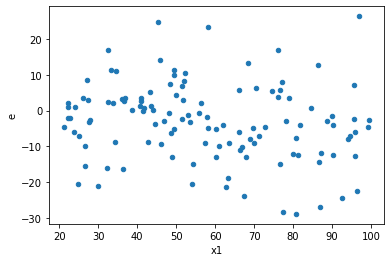

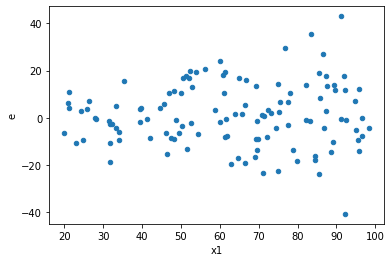

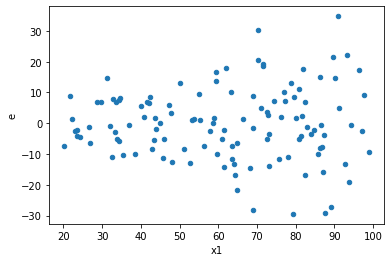

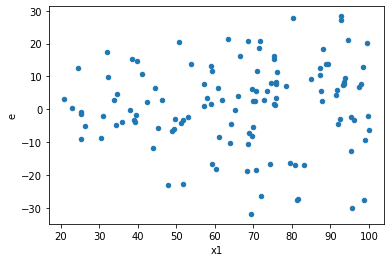

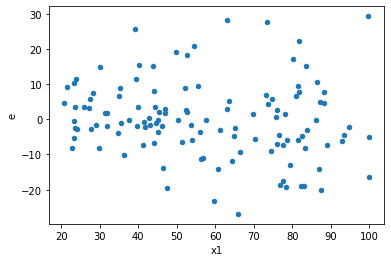

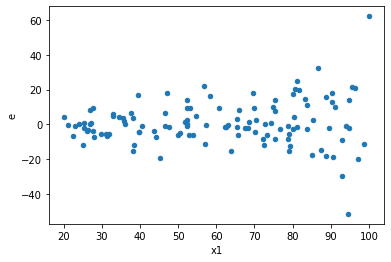

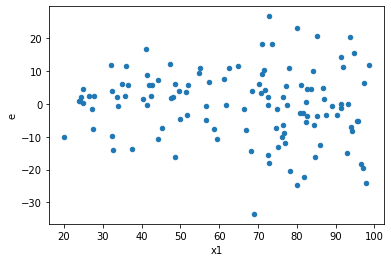

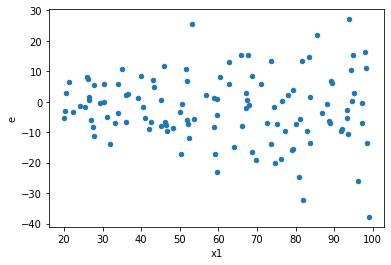

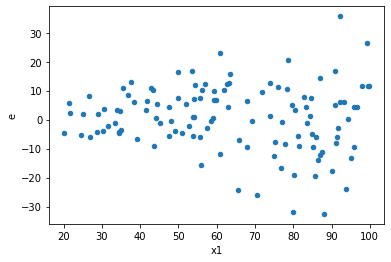

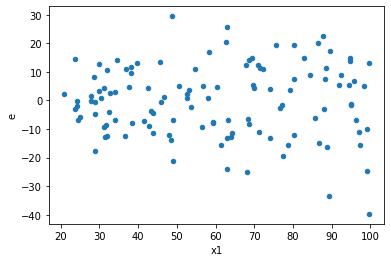

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,47.0,47.0,3833.569692466288,6428.524975885364,81.5653126056657,136.77712714649712,1.6769031194394797,0.07960293859202139,0.9601985307039893,0.039801469296010694,Reject001=1 : Homoscedasticity
1.0,47.0,47.0,4401.248643537125,12359.609246929402,93.64358816036436,262.97040950913623,2.8082051817450675,0.000566473788585764,0.9997167631057071,0.000283236894292882,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,2384.5425646797694,9089.837629632984,50.73494818467594,193.40080063048902,3.8119838011168814,1.0408718624788094e-05,0.9999947956406876,5.204359312394047e-06,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,4492.868465707266,9981.482939589365,95.592946078878,212.37197743807158,2.221628123719861,0.007209425196953667,0.9963952874015232,0.0036047125984768336,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,2618.7190377885167,7036.214020943415,55.717426335925886,149.7066812966684,2.6868915372018796,0.0009486375570773031,0.9995256812214613,0.00047431877853865156,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,2548.932886417794,15285.165821735776,54.232614604633916,325.2162940794846,5.996692146420992,8.33716740089585e-09,0.9999999958314163,4.168583700447925e-09,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,2651.850071857691,6429.1789851488575,56.42234195441896,136.79104223720972,2.424412697149597,0.0029536017925182456,0.9985231991037409,0.0014768008962591228,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,2193.9342408539956,8544.098373917768,46.67945193306374,181.78932710463337,3.894418626964841,7.662700947763668e-06,0.9999961686495261,3.831350473881834e-06,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,1917.2118346971615,8954.952754926608,40.791741163769395,190.53090967928952,4.6708207162413595,4.996948383961808e-07,0.9999997501525808,2.498474191980904e-07,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,3833.569692466288,6428.524975885364,81.5653126056657,136.77712714649712,1.6769031194394797,0.07960293859202139,Reject001=1 : Homoscedasticity
1.0,47.0,47.0,4401.248643537125,12359.609246929402,93.64358816036436,262.97040950913623,2.8082051817450675,0.000566473788585764,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,2384.5425646797694,9089.837629632984,50.73494818467594,193.40080063048902,3.8119838011168814,1.0408718624788094e-05,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,4492.868465707266,9981.482939589365,95.592946078878,212.37197743807158,2.221628123719861,0.007209425196953667,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,2618.7190377885167,7036.214020943415,55.717426335925886,149.7066812966684,2.6868915372018796,0.0009486375570773031,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,2548.932886417794,15285.165821735776,54.232614604633916,325.2162940794846,5.996692146420992,8.33716740089585e-09,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,2651.850071857691,6429.1789851488575,56.42234195441896,136.79104223720972,2.424412697149597,0.0029536017925182456,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,2193.9342408539956,8544.098373917768,46.67945193306374,181.78932710463337,3.894418626964841,7.662700947763668e-06,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,1917.2118346971615,8954.952754926608,40.791741163769395,190.53090967928952,4.6708207162413595,4.996948383961808e-07,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    776
Reject001=1 : Homoscedasticity      224
Name: Result_test, dtype: int64